In [1]:
!pip install tensorflow

In [2]:
# import
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [3]:
# load the data
df = pd.read_csv('/kenya-inflation-rate-cpi - kenya-inflation-rate-cpi.csv')

In [4]:
# clean the data
print(df.head())

         Date  GDP (Billions of US $)  Per Capita (US $)  Annual % Change
0  1960-12-31                  1.2438                NaN              NaN
1  1961-12-31                  2.4570               1.21              NaN
2  1962-12-31                  3.1175               0.66              NaN
3  1963-12-31                  0.6977              -2.42              NaN
4  1964-12-31                 -0.0993              -0.80              NaN


In [5]:
print(df.isnull().sum())

Date                       0
GDP (Billions of US $)     0
Per Capita (US $)          1
Annual % Change           64
dtype: int64


In [6]:
df = df.dropna(how='all')
df = df.dropna(axis=1, how='all')

In [7]:
# convert the 'column' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

In [8]:
print(df.dtypes)

Date                      datetime64[ns]
GDP (Billions of US $)           float64
Per Capita (US $)                float64
dtype: object


In [9]:
print(df.head())

        Date  GDP (Billions of US $)  Per Capita (US $)
0 1960-12-31                  1.2438                NaN
1 1961-12-31                  2.4570               1.21
2 1962-12-31                  3.1175               0.66
3 1963-12-31                  0.6977              -2.42
4 1964-12-31                 -0.0993              -0.80


In [10]:
# Handle missing values in 'Per Capita (US $)' by interpolation
df['Per Capita (US $)'] = df['Per Capita (US $)'].interpolate().fillna(method='bfill')


<ipython-input-10-ca1ece1e3289>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Per Capita (US $)'] = df['Per Capita (US $)'].interpolate().fillna(method='bfill')


In [11]:
# select the target variable
target_data = df[['Per Capita (US $)']].values

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(target_data)


In [13]:
# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])

    return np.array(X), np.array(y)

In [14]:
sequence_length = 12
X, y = create_sequences(scaled_data, sequence_length)

In [15]:
from posixpath import split
# Split into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.3683 - val_loss: 0.2219
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.2489 - val_loss: 0.1194
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 0.1429 - val_loss: 0.0380
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 0.0708 - val_loss: 0.0017
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0405 - val_loss: 0.0266
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0654 - val_loss: 0.0384
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0753 - val_loss: 0.0180
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0501 - val_loss: 0.0033
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0383 - val_loss: 0.0028
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0381 - val_loss: 0.0087
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0456 - val_loss: 0.0138
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0482 - val

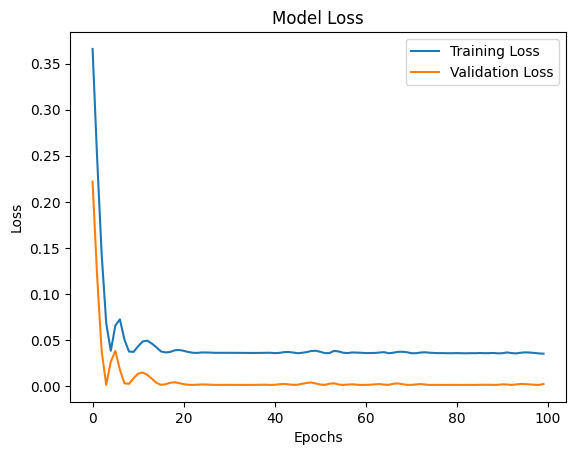

In [17]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to original scale
y_test_original = scaler.inverse_transform(y_test)  # Inverse transform true values


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


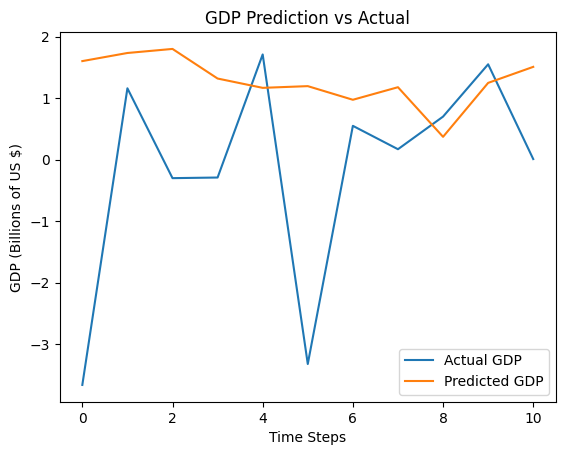

In [19]:
# Visualize predictions vs actual values
plt.plot(y_test_original, label='Actual GDP')
plt.plot(predictions, label='Predicted GDP')
plt.title('GDP Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('GDP (Billions of US $)')
plt.legend()
plt.show()